# Body Fat Estimator

This project attempts to estimate the body fat percentage of a human being using parameters such as weight, hip size, chest size etc.  

Let's load the data and see what we are working with. 

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Processing

In [2]:
# load and check head of data

df = pd.read_csv("bodyfat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [3]:
# check datatypes etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


Distribution plots for Density feature


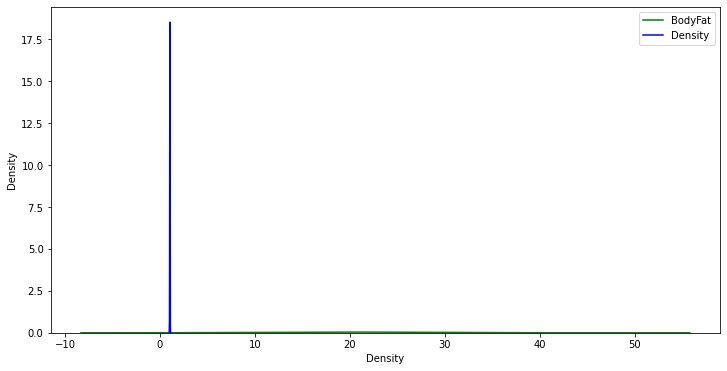

----------------------------------------------------------------------------------------------------
Distribution plots for BodyFat feature


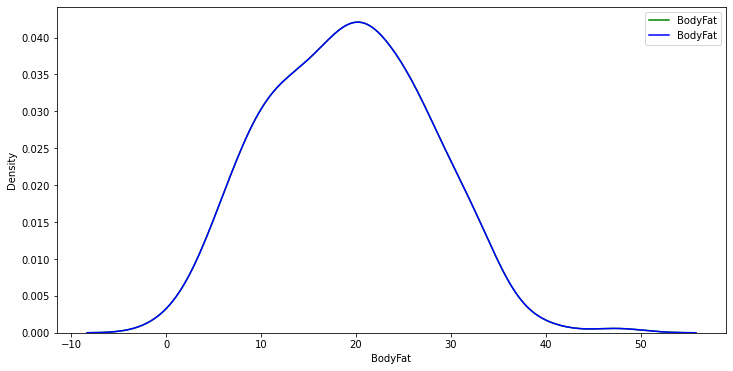

----------------------------------------------------------------------------------------------------
Distribution plots for Age feature


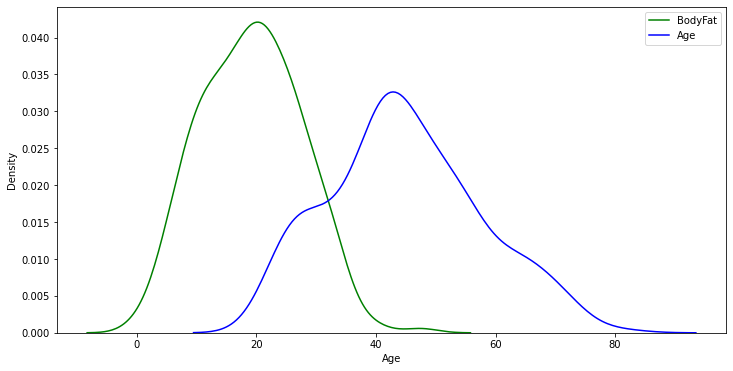

----------------------------------------------------------------------------------------------------
Distribution plots for Weight feature


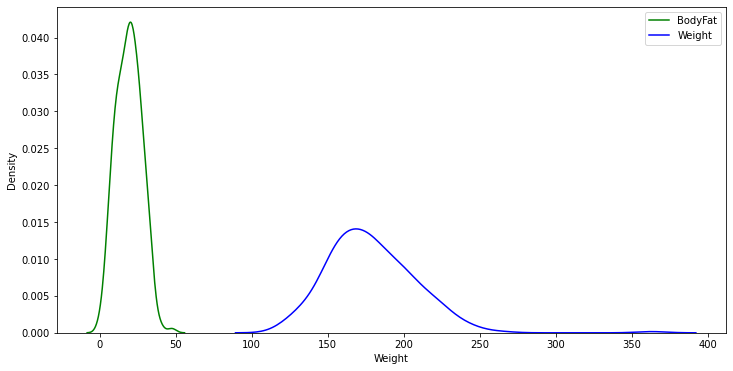

----------------------------------------------------------------------------------------------------
Distribution plots for Height feature


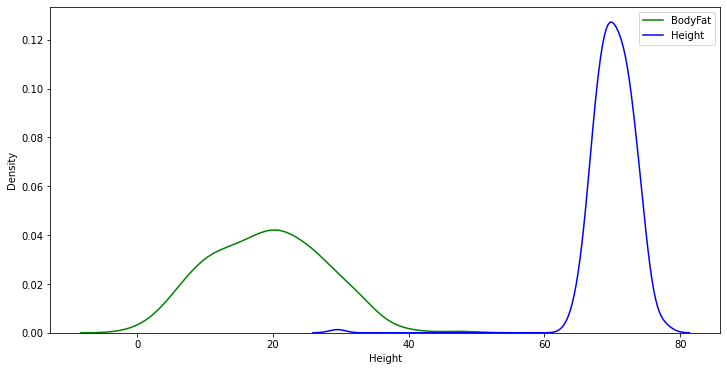

----------------------------------------------------------------------------------------------------
Distribution plots for Neck feature


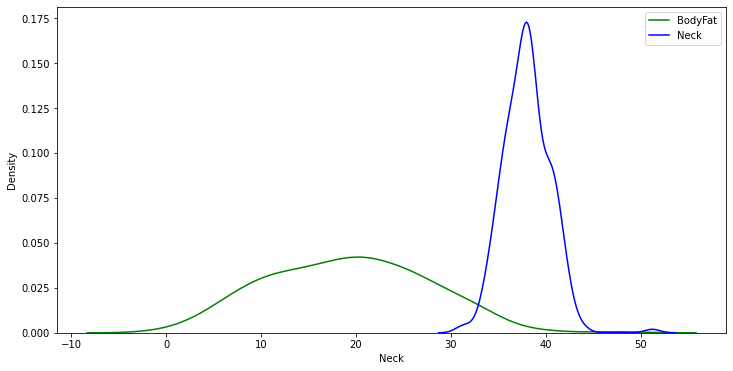

----------------------------------------------------------------------------------------------------
Distribution plots for Chest feature


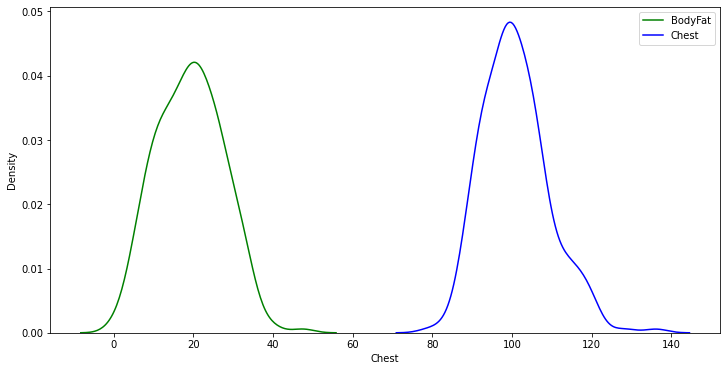

----------------------------------------------------------------------------------------------------
Distribution plots for Abdomen feature


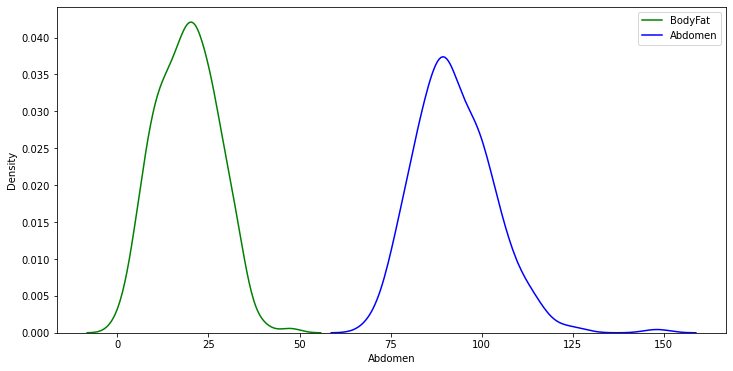

----------------------------------------------------------------------------------------------------
Distribution plots for Hip feature


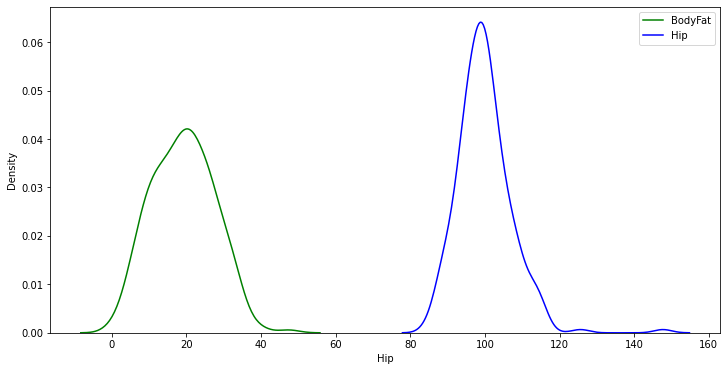

----------------------------------------------------------------------------------------------------
Distribution plots for Thigh feature


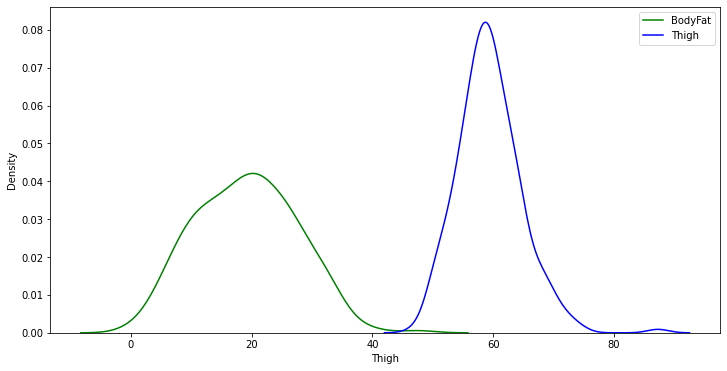

----------------------------------------------------------------------------------------------------
Distribution plots for Knee feature


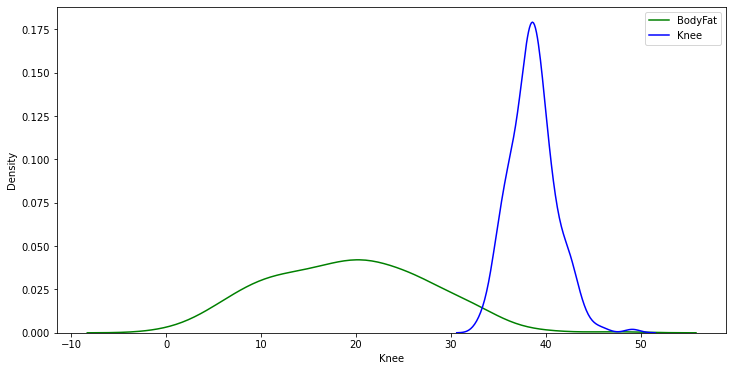

----------------------------------------------------------------------------------------------------
Distribution plots for Ankle feature


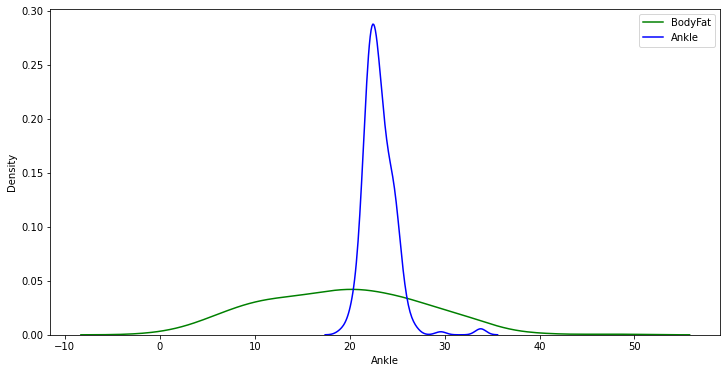

----------------------------------------------------------------------------------------------------
Distribution plots for Biceps feature


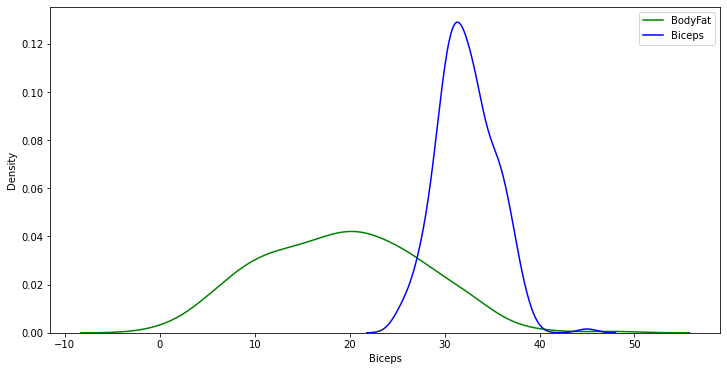

----------------------------------------------------------------------------------------------------
Distribution plots for Forearm feature


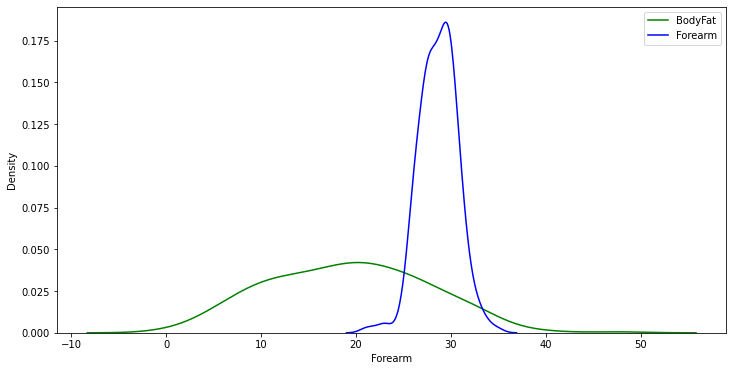

----------------------------------------------------------------------------------------------------
Distribution plots for Wrist feature


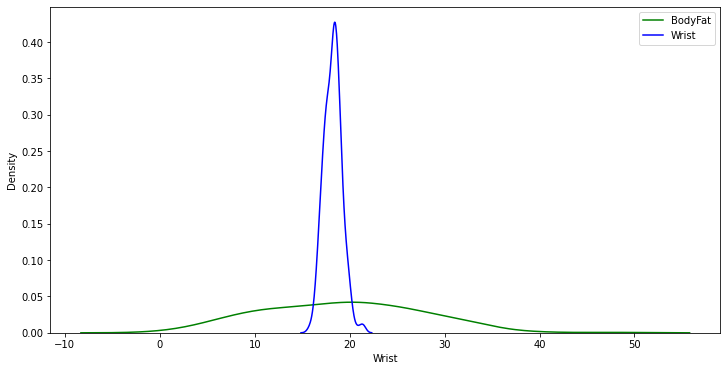

----------------------------------------------------------------------------------------------------


In [4]:
# lets check the distribution of the data by plotting it
# I will plot the body fat on the same graph so we can see how 
# it relates to the particular feature

def dist_plots(col):
  plt.figure(figsize=(12,6))
  sns.distplot(df["BodyFat"], color="Green", hist=False, label="BodyFat")
  sns.distplot(df[col], color="Blue", hist=False, label=col)
  plt.legend()
  plt.show()

col = list(df.columns)
for i in col:
  print(f"Distribution plots for {i} feature")
  dist_plots(i)
  print("-"*100)

Distribution plots for the feature Density


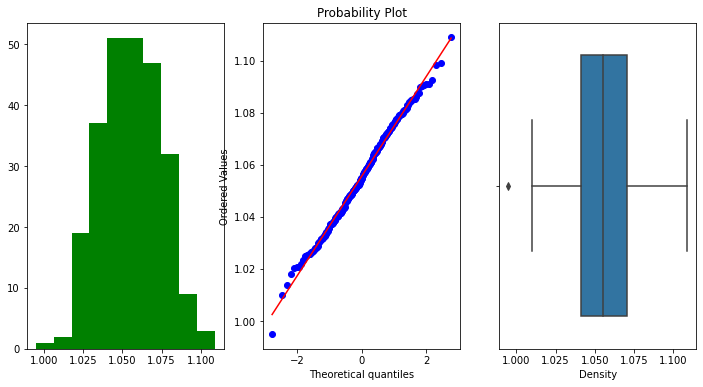

Distribution plots for the feature BodyFat


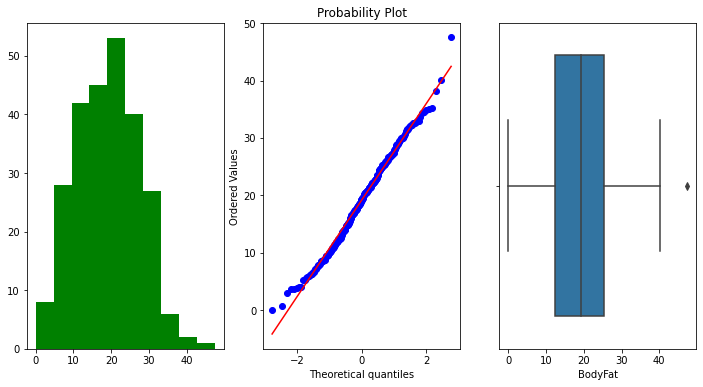

Distribution plots for the feature Age


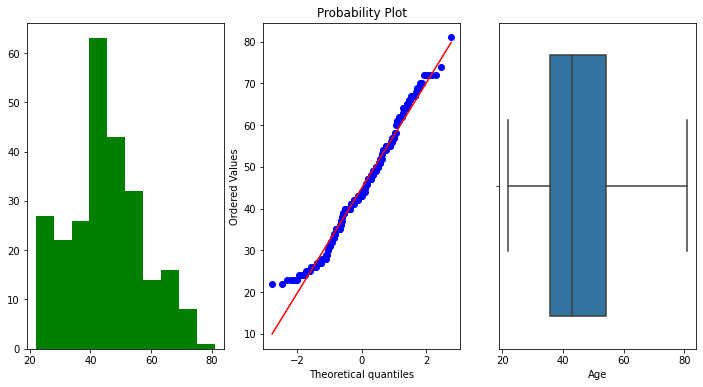

Distribution plots for the feature Weight


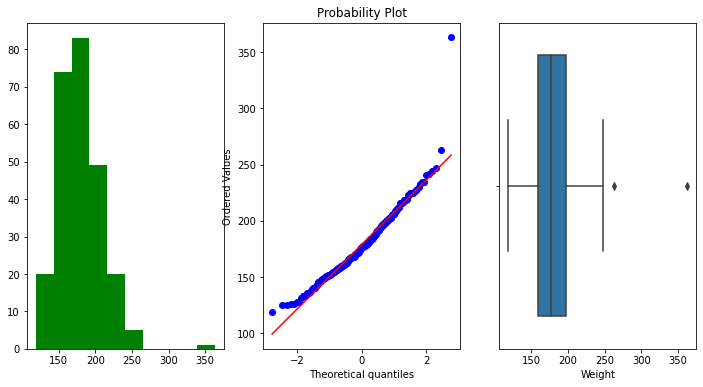

Distribution plots for the feature Height


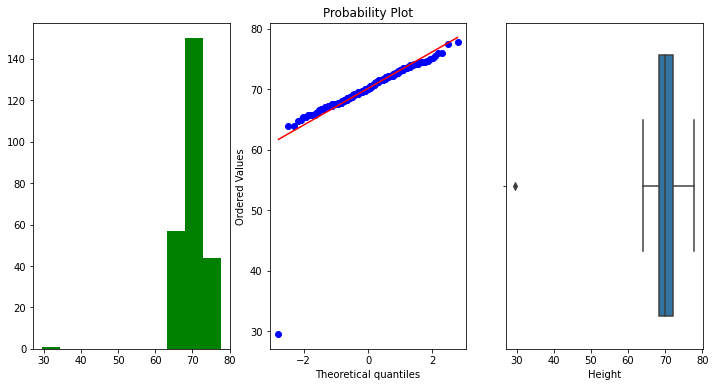

Distribution plots for the feature Neck


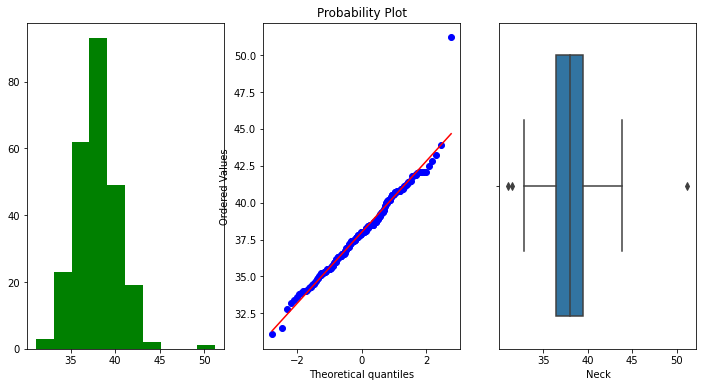

Distribution plots for the feature Chest


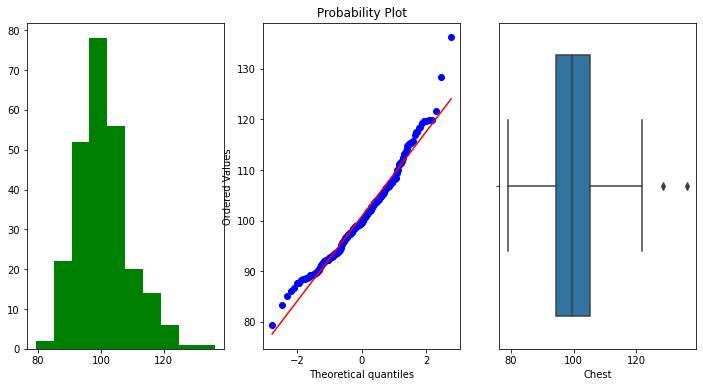

Distribution plots for the feature Abdomen


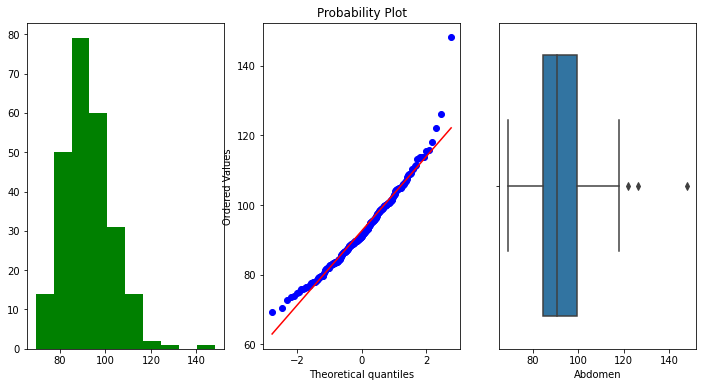

Distribution plots for the feature Hip


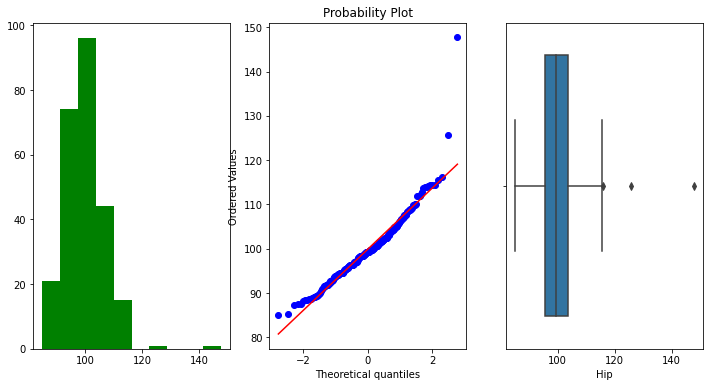

Distribution plots for the feature Thigh


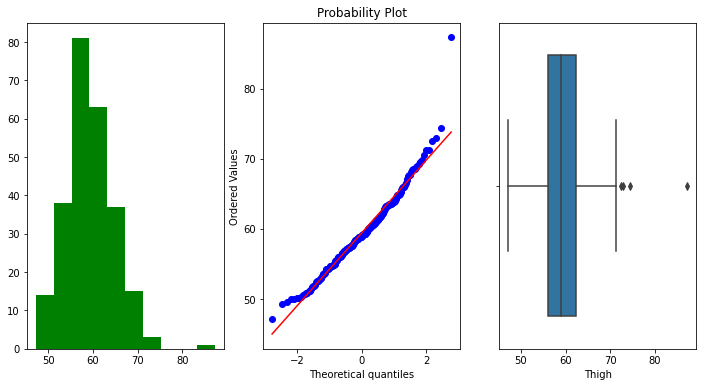

Distribution plots for the feature Knee


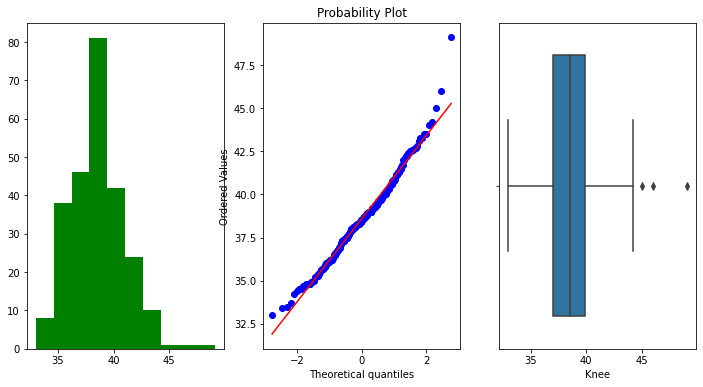

Distribution plots for the feature Ankle


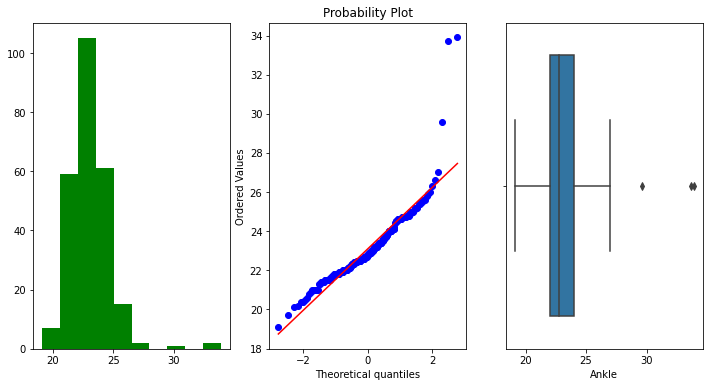

Distribution plots for the feature Biceps


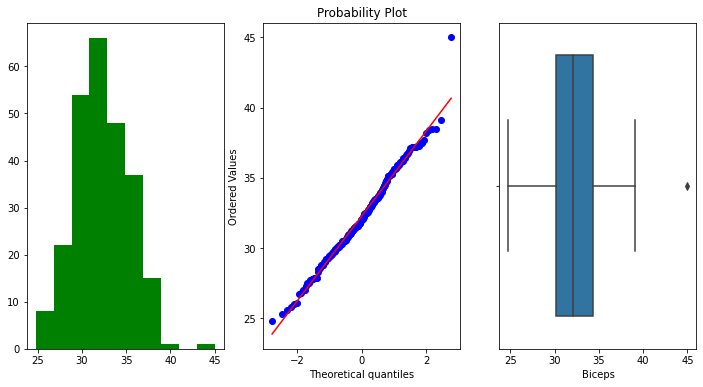

Distribution plots for the feature Forearm


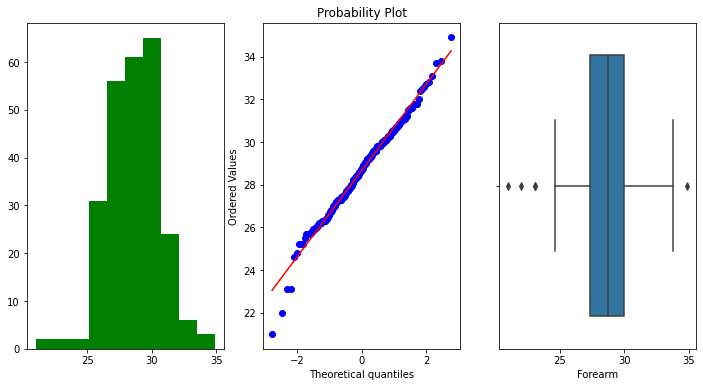

Distribution plots for the feature Wrist


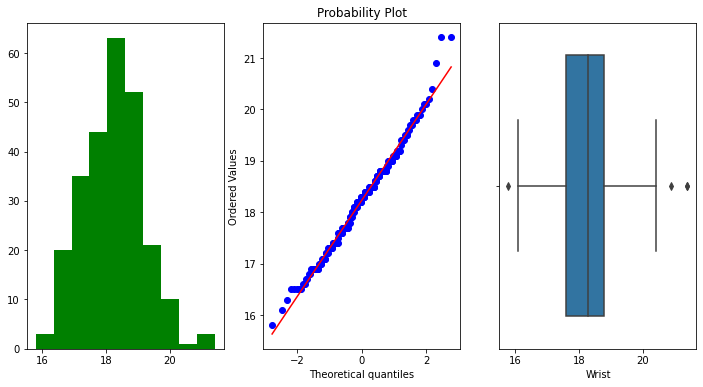

In [5]:
# now let's do some distrbution analysis
import scipy.stats as stats

def create_plot(df, col):
  plt.figure(figsize=(12,6))
  plt.subplot(1,3,1)
  plt.hist(df[col], color="Green")

  plt.subplot(1,3,2)
  stats.probplot(df[col], dist="norm", plot=plt)

  plt.subplot(1,3,3)
  sns.boxplot(df[col])

  plt.show()

cols = list(df.columns)
for i in range(len(cols)):
  print(f"Distribution plots for the feature {cols[i]}")

  create_plot(df, cols[i])

  print("="*100)

In [6]:
# everything seems to be a gaussian distrbution,  centred and skewed left and right.   There are some outliers too. Le'ts deal with this. 

upper = []
lower = []
for i in df.columns:
  upper.append(df[i].mean() + (df[i].std())*4) # this puts the upper limit to 1 to 3
  lower.append(df[i].mean() - (df[i].std())*4) # this puts the lower limit to -1 to -3

In [7]:
# if there are values that go beyond our limits, ignore them. 
cols = list(df.columns)
j = 0 
for i in range(len(cols)):
  temp = df.loc[(df[cols[i]]>upper[j])&(df[cols[i]]<lower[j])] 
  j += 1

In [8]:
temp

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


## Feature Selection

In [9]:
# create our data split before processing to avoid data leakage
data = df.copy()
test = data["BodyFat"]
train = data.drop(["BodyFat"], axis=1)

In [10]:
# import ExtraTreeRegressor and fit to data
from sklearn.ensemble import ExtraTreesRegressor
er = ExtraTreesRegressor()
er.fit(train, test)

ExtraTreesRegressor()

In [11]:
er.feature_importances_

array([0.71960374, 0.00185001, 0.02071044, 0.00365127, 0.00399391,
       0.05189924, 0.16602551, 0.01683172, 0.00571825, 0.00312161,
       0.00084405, 0.0028062 , 0.00092976, 0.00201428])

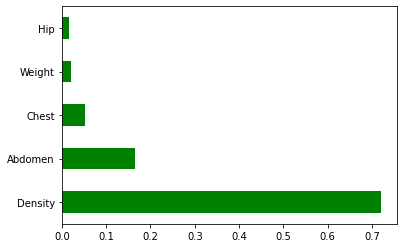

In [12]:
series = pd.Series(er.feature_importances_, index=train.columns)
series.nlargest(5).plot(kind="barh", color="Green")

In [13]:
# let's try some Mutual Informatrion Gain for feature selection
from sklearn.feature_selection import mutual_info_regression
mr = mutual_info_regression(train, test)

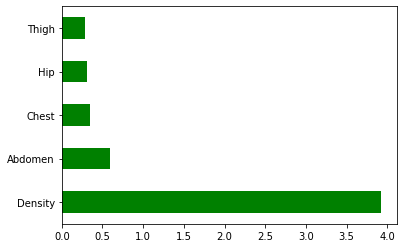

In [14]:
plot = pd.Series(mr, index=train.columns)
plot.nlargest(5).plot(kind="barh", color="Green")

In [15]:
# lets check feature correlation

data

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


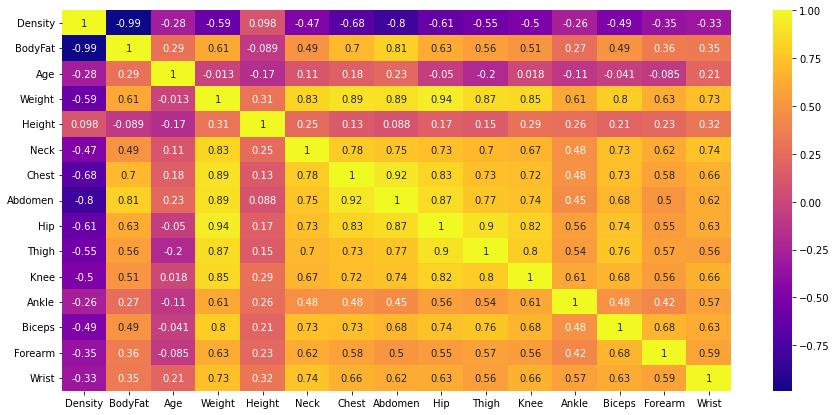

In [16]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, cmap="plasma")

In [17]:
def correlation(df, threshold):
  colcor = set()
  cormat = df.corr()

  for i in range(len(cormat)):
    for j in range(i):
      """
      for each cell, we get the value of that cell by iloc[i][j]
      where [i] is the row and [j] is the column.  If the abs value
      is greater than the threshold, get the col_name and add it
      into the set.
      """

      if abs(cormat.iloc[i][j])>threshold:
        col_name = cormat.columns[i]
        colcor.add(col_name)

  return colcor

ans = correlation(train, threshold = 0.85)

ans

{'Abdomen', 'Chest', 'Hip', 'Knee', 'Thigh'}

In [18]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
temp = data[list(data.columns)]
info = pd.DataFrame()
info["VIF"] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
info["Column"] = temp.columns
info

,VIF,Column
0,3695.622377,Density
1,33.845429,BodyFat
2,31.376101,Age
3,1238.097164,Weight
4,613.410514,Height
5,1081.965633,Neck
6,1374.457425,Chest
7,1332.624257,Abdomen
8,2933.636131,Hip
9,1017.257501,Thigh


In [20]:
cols1 = list(series.nlargest(5).index)
cols2 = list(plot.nlargest(5).index)

cols1, cols2

(['Density', 'Abdomen', 'Chest', 'Weight', 'Hip'],
 ['Density', 'Abdomen', 'Chest', 'Hip', 'Thigh'])

In [21]:
to_train = train[cols1]
to_train.head()

,Density,Abdomen,Chest,Weight,Hip
0,1.0708,85.2,93.1,154.25,94.5
1,1.0853,83.0,93.6,173.25,98.7
2,1.0414,87.9,95.8,154.00,99.2
3,1.0751,86.4,101.8,184.75,101.2
4,1.0340,100.0,97.3,184.25,101.9


## Model Building

In [22]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [23]:
X_train, X_test, y_train, y_test = train_test_split(to_train, test, test_size=0.2)
X_train.shape, X_test.shape

((201, 5), (51, 5))

In [24]:
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

DecisionTreeRegressor()

[Text(0.46930555555555553, 0.9545454545454546, 'X[0] <= 1.055\nsquared_error = 72.772\nsamples = 201\nvalue = 19.268'),
 Text(0.1815277777777778, 0.8636363636363636, 'X[0] <= 1.036\nsquared_error = 26.426\nsamples = 99\nvalue = 26.36'),
 Text(0.051944444444444446, 0.7727272727272727, 'X[0] <= 1.016\nsquared_error = 14.4\nsamples = 36\nvalue = 31.953'),
 Text(0.013333333333333334, 0.6818181818181818, 'X[1] <= 117.9\nsquared_error = 16.347\nsamples = 3\nvalue = 41.9'),
 Text(0.008888888888888889, 0.5909090909090909, 'X[3] <= 218.0\nsquared_error = 1.0\nsamples = 2\nvalue = 39.1'),
 Text(0.0044444444444444444, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 40.1'),
 Text(0.013333333333333334, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 38.1'),
 Text(0.017777777777777778, 0.5909090909090909, 'squared_error = 0.0\nsamples = 1\nvalue = 47.5'),
 Text(0.09055555555555556, 0.6818181818181818, 'X[0] <= 1.029\nsquared_error = 4.41\nsamples = 33\nvalue = 31.048'),
 Text(0.043333333333333335, 0

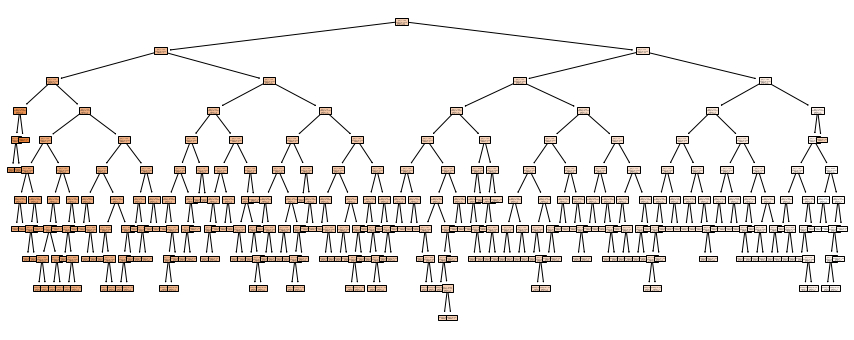

In [25]:
plt.figure(figsize=(15,6))
tree.plot_tree(reg,filled=True)

In [26]:
path = reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alpha = path.ccp_alphas

In [27]:
alpha_list = []
for i in range(len(ccp_alpha)):
  reg = DecisionTreeRegressor(ccp_alpha = ccp_alpha[i])
  reg.fit(X_train, y_train)
  alpha_list.append(reg)

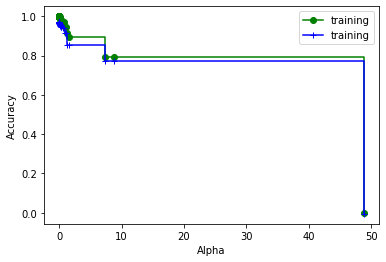

In [28]:
train_score = [alpha_list[i].score(X_train, y_train) for i in range(len(alpha_list))]

test_score = [alpha_list[i].score(X_test, y_test) for i in range(len(alpha_list))]

plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.plot(ccp_alpha, train_score, marker="o", label="training", color="Green", drawstyle="steps-post")
plt.plot(ccp_alpha, test_score, marker="+", label="training", color="Blue", drawstyle="steps-post")
plt.legend()
plt.show()

In [29]:
clf = DecisionTreeRegressor(ccp_alpha=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Decision Tree Normal Approach: {metrics.r2_score(y_test, y_pred)}")

rf = RandomForestRegressor(n_estimators=1000, ccp_alpha=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"Random Tree Normal Approach: {metrics.r2_score(y_test, y_pred_rf)}")

Decision Tree Normal Approach: 0.9163962738767047
Random Tree Normal Approach: 0.9504172904803331


## Tuning Hyperparameters

In [30]:
params = {"Random Forest":{"model": RandomForestRegressor(), 
                           "params": {"n_estimators": [int(x) for x in np.linspace(start=1, stop=1200, num=10)],
                                      "criterion": ["mse", "mae"],
                                      "max_depth": [int(x) for x in np.linspace(start=1, stop=30, num=5)],
                                      "min_samples_split": [2,5,10,12],
                                      "min_samples_leaf": [2,5,10,12],
                                      "max_features": ["auto", "sqrt"],
                                      "ccp_alpha": [1,2,2.5,3,3.5,4,4.5]}},
          "D-Tree": {"model": DecisionTreeRegressor(),
                     "params": {"criterion": ["mse", "mae"],
                                "splitter": ["best", "random"],
                                "min_samples_split": [2,5,10,12],
                                "min_samples_leaf": [2,5,10,12],
                                "max_features": ["auto", "sqrt"],
                                "ccp_alpha": [1,2,2.5,3,3.5,4,4.5]}},
          "SVM": {"model": SVR(),
                  "params": {"C": [0.25, 0.50, 0.75, 1.0],
                             "tol": [1e-10,1e-5,1e-4,0.0025,0.50,0.75],
                             "kernel": ["linear", "poly", "rbf", "sigmoid"],
                             "max_iter": [int(x) for x in np.linspace(start=1, stop=250, num=10)]}}}

In [31]:
score = []
for modelname, mp in params.items():
  clf = RandomizedSearchCV(mp["model"], param_distributions = mp["params"],
                           cv=5, n_jobs=-1, n_iter=10, scoring="neg_mean_squared_error")
  
  clf.fit(X_train, y_train)
  score.append({"model_name": modelname,
                 "best_score": clf.best_score_,
                 "best_estimator": clf.best_estimator_})

In [32]:
scores_df = pd.DataFrame(score, columns=["model_name", "best_score", "best_estimator"])

scores_df

,model_name,best_score,best_estimator
0,Random Forest,-5.590346,"(DecisionTreeRegressor(ccp_alpha=2.5, max_dept..."
1,D-Tree,-5.738795,"DecisionTreeRegressor(ccp_alpha=1, criterion='..."
2,SVM,-47.704702,"SVR(C=0.75, max_iter=250, tol=0.5)"


In [35]:
score[0]["best_estimator"]

RandomForestRegressor(ccp_alpha=2.5, criterion='mse', max_depth=15,
                      min_samples_leaf=2, n_estimators=1200)

In [36]:
rf = score[0]["best_estimator"]
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(metrics.r2_score(y_test, y_pred))

0.9124530032924161


In [37]:
to_train_list = np.array(to_train)
predicted = []
for i in range(len(to_train_list)):
  predicted.append(rf.predict([to_train_list[i]]))

to_train["Actual Result"] = test
to_train["Predicted Result"] = np.array(predicted)

to_train

,Density,Abdomen,Chest,Weight,Hip,Actual Result,Predicted Result
0,1.0708,85.2,93.1,154.25,94.5,12.3,13.671401
1,1.0853,83.0,93.6,173.25,98.7,6.1,8.043369
2,1.0414,87.9,95.8,154.00,99.2,25.3,23.099654
3,1.0751,86.4,101.8,184.75,101.2,10.4,8.189234
4,1.0340,100.0,97.3,184.25,101.9,28.7,30.892188
...,...,...,...,...,...,...,...
247,1.0736,83.6,89.2,134.25,88.8,11.0,8.926728
248,1.0236,105.0,108.5,201.00,104.5,33.6,31.532011
249,1.0328,111.5,111.1,186.75,101.7,29.3,31.352514
250,1.0399,101.3,108.3,190.75,97.8,26.0,23.531231


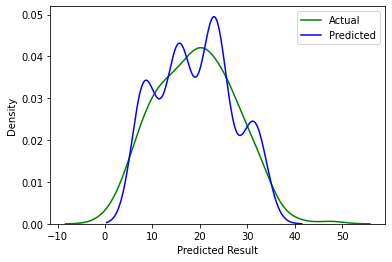

In [42]:
sns.distplot(to_train["Actual Result"], label="Actual", hist=False, color="Green")
sns.distplot(to_train["Predicted Result"], label="Predicted", hist=False, color="Blue")
plt.legend()
plt.show()

In [45]:
# let's try a custom Random Forest as there seems to be a lot of variation in the predictions

to_train = to_train.drop(["Actual Result", "Predicted Result"], axis=1)

rf = RandomForestRegressor(n_estimators=1000, ccp_alpha=1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(metrics.r2_score(y_test, y_pred))

0.9506524432891879


In [46]:
to_train_list = np.array(to_train)
predicted = []
for i in range(len(to_train_list)):
  predicted.append(rf.predict([to_train_list[i]]))

to_train["Actual Result"] = test
to_train["Predicted Result"] = np.array(predicted)

to_train

,Density,Abdomen,Chest,Weight,Hip,Actual Result,Predicted Result
0,1.0708,85.2,93.1,154.25,94.5,12.3,13.136390
1,1.0853,83.0,93.6,173.25,98.7,6.1,7.388785
2,1.0414,87.9,95.8,154.00,99.2,25.3,24.578861
3,1.0751,86.4,101.8,184.75,101.2,10.4,8.997856
4,1.0340,100.0,97.3,184.25,101.9,28.7,30.210821
...,...,...,...,...,...,...,...
247,1.0736,83.6,89.2,134.25,88.8,11.0,9.621151
248,1.0236,105.0,108.5,201.00,104.5,33.6,31.839497
249,1.0328,111.5,111.1,186.75,101.7,29.3,30.485273
250,1.0399,101.3,108.3,190.75,97.8,26.0,24.926114


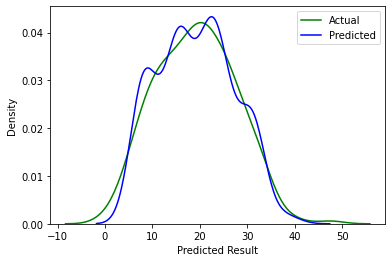

In [47]:
sns.distplot(to_train["Actual Result"], label="Actual", hist=False, color="Green")
sns.distplot(to_train["Predicted Result"], label="Predicted", hist=False, color="Blue")
plt.legend()
plt.show()

This is a much stable model! 

In [48]:
import pickle 
file=open("bodyfatmodel.pkl", "wb")
pickle.dump(rf, file)
file.close()